# 📊 Project: Analyzing common posts and potential hours to post in Hacker New Community

## Introduction
With the explosive of growth in computer , there are lots of communities on online to help you searching and studying, for instance: ***StackOverFlow***, ***Reddit***, ***dev.to***, and ***HackerNew***. In this project, i am going to work as a Data Analyst to analyze "Hacker New" dataset.
My aim for this project is to determine:
- The potential hours to post in Hacker News Community
- Which type of post is more common in the community: Ask HN or Show HN?
 1. `Ask HN`: Users ask the Hackers New Commnutiy a specific question about: coding, websites, programming languages, etc.
 2. `Show HN`: Users show to the Hackers New Comminity a project, product,etc.

## Table of Contents
1. [Project](#Project:Analyzing-common-posts-and-potential-hours-to-post-in-Hacker-New-Community)
    * [Introduction](#Introduction)
    * [Table of Contents](#Table-of-Contents)
    * [Data Description](#Descriptions-of-the-columns)
2. [Data Exploration](#Reading-and-Exploring-the-Data)
    * [Data Quality Report](#Data-Quality-Report)
    * [Post Type Analysis](#Calculating-which-type-of-post-is-more-common-in-the-community)
    * [Common Interacted Post](#Determining-if-ask-posts-or-show-posts-receive-more-comments-on-average)
3. [Average Comments](#Calculating-the-Average-Number-of-Comments-for-Ask-HN-Posts-by-Hour)
    * [Optimal Posting Times](#If-ask-posts-created-at-a-certain-time-are-more-likely-to-attract-comments)
    * [Recommendations](#The-potential-hours-to-post-in-Hacker-News-Community)
4. [Conclusion](#Conclusion)

## Descriptions of the columns
1. id: the unique identifier from Hacker News for the post
2. title: the title of the post
3. url: the URL that the posts links to, if the post has a URL
4. num_points: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
5. num_comments: the number of comments on the post
6. author: the username of the person who submitted the post
7. created_at: the date and time of the post's submission

# Reading and Exploring the Data

- The URL for the dataset: https://www.kaggle.com/datasets/hacker-news/hacker-news-posts
- You can find the data set here, but note that we have reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that didn't receive any comments and then randomly sampling from the remaining submissions.
- The date of the data from Sep 2015 to Sep 26 2016

In [7]:
# A Function to read the file_csv
def extract_file(file_csv):
    from csv import reader
    with open(file_csv,encoding = 'utf-8') as opened_file:
        read_file = reader(opened_file)
        dataset = list(read_file)
    return dataset

In [8]:
hacker_new = extract_file('hacker_news.csv')
header_hn = hacker_new[0]
hacker_new = hacker_new[1:]

To make it easier to read the dataset, i create a def(explore_data) to show rows starting by header and ending with a row you want, as well as showing the total number of apps.

In [9]:
def explore_data(dataset,start,end,rows_columns=False):
    data_slice = dataset[start:end]
    for space in data_slice:
        display(space)
        print("\n")
    if rows_columns ==True:
        print(f"Number of Columns: {len(dataset[0])}")
        print(f"Number of Rows: {len(dataset)}")

In [10]:
print(header_hn)
print("\n")
explore_data(hacker_new,0,5,True)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']




['12224879',
 'Interactive Dynamic Video',
 'http://www.interactivedynamicvideo.com/',
 '386',
 '52',
 'ne0phyte',
 '8/4/2016 11:52']

['10975351',
 'How to Use Open Source and Shut the Fuck Up at the Same Time',
 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
 '39',
 '10',
 'josep2',
 '1/26/2016 19:30']

['11964716',
 "Florida DJs May Face Felony for April Fools' Water Joke",
 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
 '2',
 '1',
 'vezycash',
 '6/23/2016 22:20']

['11919867',
 'Technology ventures: From Idea to Enterprise',
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 '3',
 '1',
 'hswarna',
 '6/17/2016 0:01']

['10301696',
 'Note by Note: The Making of Steinway L1037 (2007)',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 '8',
 '2',
 'walterbell',
 '9/30/2015 4:12']



Number of Columns: 7
Number of Rows: 20100


## Data Quality Report

Before analyzing the data, i am going to create a report to check the quality of data which i am working with.

In [11]:
import pandas as pd
Hacker_new = pd.read_csv('hacker_news.csv')

In [12]:
def check_data_quality(df,column):
    quality_report = {
        'null_values': df.isnull().sum().to_dict(),
        'duplicate_values': df[column].duplicated().sum(),
        'unique_values': len(df[column].unique()),
        'total_rows': len(df)
        }
    return quality_report

Hacker New report based on Id column represents an user.If two rows have the same ID, they are considered duplicates.

In [13]:
quality_report = check_data_quality(df=Hacker_new,column='id')
display(quality_report)

{'null_values': {'id': 0,
  'title': 0,
  'url': 2440,
  'num_points': 0,
  'num_comments': 0,
  'author': 0,
  'created_at': 0},
 'duplicate_values': 0,
 'unique_values': 20100,
 'total_rows': 20100}

There is no duplicate values in this dataset. About null values in ***URL column***, i just browsed the column and saw that partially null_values mean ***Title column*** including: "Ask HN". The data is consistent, we dont need to clean it.

## Calculating which type of post is more common in the community

I am going to create three lists: `ask_posts`, `show_posts`, and `other_posts`. Then i will loop thourgh ***hacker_mew*** dataset. If title(row[1]) starts with `ask hn` or `show hn` by using ***startswith() method***.
1. If it starts with `ask hn` => append to ask_posts
2. __________________ `show hn` =>________ show_posts
3. If it doesn't have `ask or show hn` => append to other posts

<span style="color: red;">*Note: Using lower() to make the data consistent and advoid an instance: there is a capitalized letter in "ask or show hn"</span>

*Syntax: string.startswith(value, start, end)

In [14]:
ask_posts = []
show_posts = []
other_posts = []
for row in hacker_new:
    title = row[1]
    if title.lower().startswith("ask hn",0,10):
        ask_posts.append(row)
    elif title.lower().startswith("show hn",0,10):
        show_posts.append(row)
    else:
        other_posts.append(row)

In [15]:
print(f"""With {len(other_posts):,} posts, "Other" posts represents {round((len(other_posts)/len(hacker_new))*100,2)}% of the total""")
print(f""" "Show" and "Ask" posts account for only ({len(show_posts)} posts - {round((len(show_posts)/len(hacker_new))*100,2)}%) and ({len(ask_posts)} posts - {round((len(ask_posts)/len(hacker_new))*100,2)}%) of the total, respectively""")

With 17,194 posts, "Other" posts represents 85.54% of the total
 "Show" and "Ask" posts account for only (1162 posts - 5.78%) and (1744 posts - 8.68%) of the total, respectively


Based on the report: it seems like the topic related to `"Ask" posts` have a higher number of posts and average percentage in the ***Hacker New Community*** compared to `"Show" posts`, with the difference of 582 posts and approximately 3%.

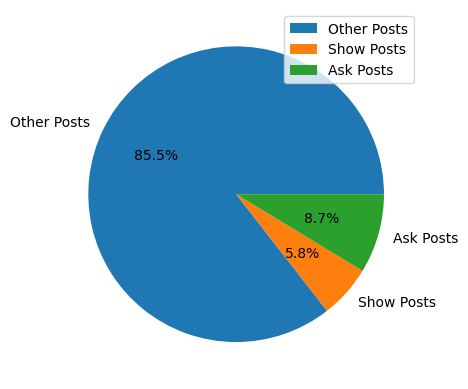

In [16]:
from matplotlib import pyplot as plt
other_post = 85.54

import numpy as np
y = np.array([85.54,5.78,8.68])
mylabels = ['Other Posts', 'Show Posts', 'Ask Posts']
plt.pie(y,labels = mylabels,autopct='%1.1f%%')
plt.legend()
plt.show()

## Determining if ask posts or show posts receive more comments on average

To calculate the average number of comments on posts, i am going to create a function that takes `3 parameters`:
1. list_type = the dataset containing the posts.
2. index = the index of the column from which i want to retrieve values
3. post_type = the name of the post type (used for display)

- Step 1: total_comments = 0 to calculate the sum of the comments
- Step 2: Loop thourgh the list_type, i use"try and except" to avoide null_values and ValueError, also to convert [the number of comments] to int.
- Step 3: Calculate the average : Average = Total / Len
- Step 4: Use two code cells below to print  the average number of comments for `Ask_posts` and `show_posts`

In [17]:
def avg_comments(list_type,index,post_type):
    total_comments = 0
    for posts in list_type:
        num_comments = posts[index]
        try:
            if num_comments !="":
                total_comments += int(num_comments)
            elif num_comments =="":
                num_comments = 0
        except ValueError:
            num_comments = 0
    print(f"Total number of {post_type} comments: {total_comments}")
    print(f"Average number of {post_type} comments: {total_comments / len(list_type)}")

In [18]:
avg_comments(ask_posts,4,"Ask Post")

Total number of Ask Post comments: 24483
Average number of Ask Post comments: 14.038417431192661


In [19]:
avg_comments(show_posts,4,"Show Post")

Total number of Show Post comments: 11988
Average number of Show Post comments: 10.31669535283993


From these two calculations, we can see that users tend to interact more with `Ask Posts` than `Show Post` based on both metricss: total and average number of comments. This is because `Ask Posts` raise questions, people excitingly engage in and have discussions. In opposed to `Ask posts`, `a Show post` only shows a project with an URL for users to click and explore, which can lead to less interact on the post.

## Calculating the Average Number of Comments for Ask HN Posts by Hour

### If ask posts created at a certain time are more likely to attract comments.
* Calculate the number of ask posts created in each hour of the day, along with the number of comments received.
* Calculate the average number of comments ask posts receive by hour created.

Firstly, to calculate the number of ask posts created in each hour, we need two metrics: format(hours) from column"Created_at" in row[-1] and Using to dict to calculate the sum of comments and count the number of comments like def (frequency_table).
- ***Step 1***: Prepare modules: datetime and defaultdict module
- ***Step 2***: Create 2 defaultdict: one is for count and another is for sum
- ***Step 3***: Loop thourgh `Ask_posts" dataset to retrieve values from row[4] and row[-1]
- ***Step 4***: Use datetime.strptime to parse string as Dates and Strftime to format Dates to Hours
- ***Step 5***: Count +=1 and sum += comment
- ***Step 6***: conver defaultdict to dict and print

<span style="color: red;">*Note: I use defaultdict, because it automatically initialize the value to 0 when you encounter a new key, using a more concise approach than an if/else.</span>

* Calculate the number of ask posts created in each hour of the day, along with the number of comments received.

In [20]:
import datetime as dt

from collections import defaultdict
counts_by_hour = defaultdict(int) # ask posts created
comments_by_hour = defaultdict(int) #Number of comments

#Loop and use the defaultdict and datetime
for row in ask_posts:
    date_time = row[-1]
    comment = int(row[4])
    hour = dt.datetime.strptime(date_time, "%m/%d/%Y %H:%M").strftime("%H")
    counts_by_hour[hour] += 1 
    comments_by_hour[hour] += comment

#Convert defaultdict to dict
counts_by_hour = dict(counts_by_hour)
comments_by_hour = dict(comments_by_hour)

#Display the result
print(f"Comment by hour: {comments_by_hour}")
print("\n")
print(f"Count by hours: {counts_by_hour}")

Comment by hour: {'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


Count by hours: {'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}


* Calculate the average number of comments ask posts receive by hour created.

In [21]:
avg_comment_by_hour = []
for hr in comments_by_hour:
    average = comments_by_hour[hr] / counts_by_hour[hr]
    avg_comment_by_hour.append((hr,average))
print(avg_comment_by_hour)
print("\n")

[('09', 5.5777777777777775), ('13', 14.741176470588234), ('10', 13.440677966101696), ('14', 13.233644859813085), ('16', 16.796296296296298), ('23', 7.985294117647059), ('12', 9.41095890410959), ('17', 11.46), ('15', 38.5948275862069), ('21', 16.009174311926607), ('20', 21.525), ('02', 23.810344827586206), ('18', 13.20183486238532), ('03', 7.796296296296297), ('05', 10.08695652173913), ('19', 10.8), ('01', 11.383333333333333), ('22', 6.746478873239437), ('08', 10.25), ('04', 7.170212765957447), ('00', 8.127272727272727), ('06', 9.022727272727273), ('07', 7.852941176470588), ('11', 11.051724137931034)]




### The potential hours to post in Hacker News Community

Although we now have the results we need, this format makes it difficult to identify the hours with the highest values. Let's finish by sorting the list of lists and printing the five highest values in a format that's easier to read.

In [22]:
#Top 5 Hours for Ask Post comments
top_5_hour = sorted(avg_comment_by_hour,key=lambda x:x[1],reverse=True)[:5]
print("Top 5 Hours for Ask Post Comments")
for hr,avg in top_5_hour:
    print(f"""{dt.datetime.strptime(hr,"%H").strftime("%H:%M")} | {avg:.2f} average comments per post""") #00 -> 00:00

Top 5 Hours for Ask Post Comments
15:00 | 38.59 average comments per post
02:00 | 23.81 average comments per post
20:00 | 21.52 average comments per post
16:00 | 16.80 average comments per post
21:00 | 16.01 average comments per post


# Conclusion

✅ According to the "TOP 5 Hours for Ask Post Comments", the best time to post is 15:00 (3:00 PM) (in the Western US). In my country, VietNam, the time to post in Hack New Community is `5:00 AM, 6:00 AM, 10:00 AM, 11:00 AM, and 16:00 PM` the next day.

In [23]:
# Difference in time between US and VietNam (+14)
hour_14 = dt.timedelta(hours = 14)

# Top 5 Hours for posting in Hack New Community following Vietnam's time
for hr,avg in top_5_hour:
    print(f"""{(dt.datetime.strptime(hr,"%H") + hour_14).strftime("%H:%M")} | {avg:.2f} average comments per post in VietNam""")

05:00 | 38.59 average comments per post in VietNam
16:00 | 23.81 average comments per post in VietNam
10:00 | 21.52 average comments per post in VietNam
06:00 | 16.80 average comments per post in VietNam
11:00 | 16.01 average comments per post in VietNam
